In [ ]:
#using cleaned-HIV
#import modules
!pip install kneed
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import pandas as pd
from kneed import KneeLocator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.read_csv('10YearPeriodHIV.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               75 non-null     object 
 1   Period2011             75 non-null     int64  
 2   ART coverage 2011      75 non-null     float64
 3   Death by HIV 2011      75 non-null     float64
 4   People with HIV 2011   75 non-null     float64
 5   Total Population 2011  75 non-null     float64
 6   Period2012             75 non-null     int64  
 7   ART coverage 2012      75 non-null     float64
 8   Death by HIV 2012      75 non-null     float64
 9   People with HIV 2012   75 non-null     float64
 10  Total Population 2012  75 non-null     float64
 11  Period2013             75 non-null     int64  
 12  ART coverage 2013      75 non-null     float64
 13  Death by HIV 2013      75 non-null     float64
 14  People with HIV 2013   75 non-null     float64
 15  Total Po

,Location,Period2011,ART coverage 2011,Death by HIV 2011,People with HIV 2011,Total Population 2011,Period2012,ART coverage 2012,Death by HIV 2012,People with HIV 2012,...,Period2020,ART coverage 2020,Death by HIV 2020,People with HIV 2020,Total Population 2020,Period2021,ART coverage 2021,Death by HIV 2021,People with HIV 2021,Total Population 2021
0,Equatorial Guinea,2011,10.0,1900.0,37000.0,986861.0,2012,15.0,2100.0,40000.0,...,2020,40.0,2300.0,64000.0,1402985.0,2021,41.0,2300.0,66000.0,1449891.0
1,Tajikistan,2011,10.0,200.0,6300.0,7697507.0,2012,12.0,200.0,7200.0,...,2020,63.0,200.0,13000.0,9537642.0,2021,65.0,200.0,13000.0,9749625.0
2,Angola,2011,10.0,16000.0,260000.0,24220660.0,2012,12.0,16000.0,270000.0,...,2020,35.0,16000.0,310000.0,32866268.0,2021,41.0,15000.0,320000.0,33933611.0
3,Sierra Leone,2011,11.0,4600.0,71000.0,6563238.0,2012,11.0,4400.0,72000.0,...,2020,50.0,3200.0,76000.0,7976985.0,2021,61.0,3000.0,76000.0,8141343.0
4,Latvia,2011,12.0,500.0,4600.0,2059709.0,2012,14.0,500.0,4800.0,...,2020,41.0,100.0,7400.0,1900449.0,2021,39.0,100.0,7800.0,1883162.0


In [ ]:
X = df.iloc[:50,[55,54]]
print(X)

    Total Population 2021  People with HIV 2021
0               1449891.0               66000.0
1               9749625.0               13000.0
2              33933611.0              320000.0
3               8141343.0               76000.0
4               1883162.0                7800.0
5              18275704.0                 810.0
6               2015490.0               40000.0
7               5180208.0               34000.0
8              19002586.0               35000.0
9                888456.0                 200.0
10             11935764.0                5400.0
11              4775110.0                9400.0
12               902899.0                1400.0
13             51265841.0              170000.0
14             39835428.0               11000.0
15             32776195.0               82000.0
16             27224262.0              500000.0
17              9340314.0               28000.0
18              2811666.0                1400.0
19              6702379.0               

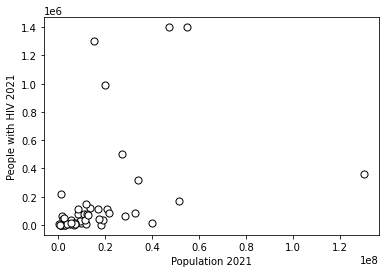

In [ ]:
#plotting

x_= df.iloc[:50,55]
y_= df.iloc[:50,54]
plt.scatter(
   x_, y_,
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.xlabel("Population 2021")
plt.ylabel("People with HIV 2021")
plt.show()

In [ ]:
# train K-Means clustering
km = KMeans(
    n_clusters=4, init='random',
    n_init=50, max_iter=300, 
    tol=1e-04, random_state=0
)
label = km.fit(X)
labels = label.labels_
y_km = km.fit_predict(X)
print(y_km)

[2 2 3 2 2 1 2 2 1 2 1 2 2 3 3 3 1 2 2 2 2 2 1 1 2 2 2 3 1 2 1 2 1 1 2 1 1
 0 2 1 1 2 1 2 2 2 1 3 1 2]


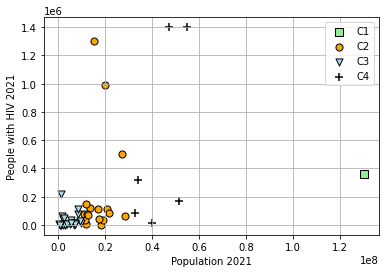

In [ ]:
# plot the 4 clusters
plt.scatter(
    X.iloc[y_km == 0, 0], X.iloc[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='C1'
)

plt.scatter(
    X.iloc[y_km == 1, 0], X.iloc[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='C2'
)

plt.scatter(
    X.iloc[y_km == 2, 0], X.iloc[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='C3'
)
plt.scatter(
    X.iloc[y_km == 3, 0], X.iloc[y_km == 3, 1],
    s=50, c='black',
    marker='+', edgecolor='black',
    label='C4'
)


plt.legend(scatterpoints=1)
plt.grid()
plt.xlabel("Population 2021")
plt.ylabel("People with HIV 2021")
plt.show()

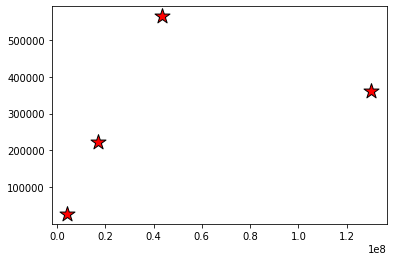

In [ ]:
# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

In [ ]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 50):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)
    print(i, distortions)

1 [2.2307377567659244e+16]
2 [2.2307377567659244e+16, 9282755418781188.0]
3 [2.2307377567659244e+16, 9282755418781188.0, 2438313697850307.0]
4 [2.2307377567659244e+16, 9282755418781188.0, 2438313697850307.0, 1128492488417569.0]
5 [2.2307377567659244e+16, 9282755418781188.0, 2438313697850307.0, 1128492488417569.0, 592461462964657.0]
6 [2.2307377567659244e+16, 9282755418781188.0, 2438313697850307.0, 1128492488417569.0, 592461462964657.0, 351527478205124.1]
7 [2.2307377567659244e+16, 9282755418781188.0, 2438313697850307.0, 1128492488417569.0, 592461462964657.0, 351527478205124.1, 234682110193992.9]
8 [2.2307377567659244e+16, 9282755418781188.0, 2438313697850307.0, 1128492488417569.0, 592461462964657.0, 351527478205124.1, 234682110193992.9, 214130133949812.5]
9 [2.2307377567659244e+16, 9282755418781188.0, 2438313697850307.0, 1128492488417569.0, 592461462964657.0, 351527478205124.1, 234682110193992.9, 214130133949812.5, 203571499099537.1]
10 [2.2307377567659244e+16, 9282755418781188.0, 2438

In [ ]:
kl = KneeLocator(range(1, 50), distortions, curve="convex", direction="decreasing")
kl.elbow

5

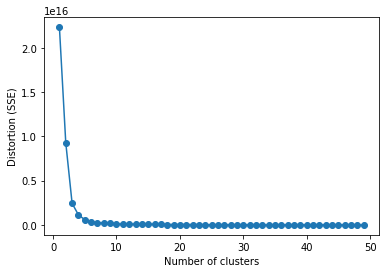

In [ ]:
# plot
plt.plot(range(1, 50), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion (SSE)')
plt.show()

In [ ]:
# calculate distortion for a range of number of cluster
# Kalo udah ada label pake rand
from sklearn import metrics

rand = []
for i in range(1, 50):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    rand_ = metrics.adjusted_rand_score(y_km, km.labels_)
    rand.append(rand_)
    print(i, rand_)

1 0.0
2 0.343031440638198
3 0.35035919293300793
4 1.0
5 0.9268933139708369
6 0.6033066444837267
7 0.49293043724537594
8 0.3908886637000485
9 0.38887841867787104
10 0.39338725446626965
11 0.30583023494976663
12 0.295435214062943
13 0.23503631211206846
14 0.21853420495350337
15 0.20905778720656737
16 0.20668335390400608
17 0.19810229113631103
18 0.15963448179402304
19 0.14749827688928868
20 0.12796491927446682
21 0.11322085709246958
22 0.11568383199755565
23 0.10581836162848195
24 0.0959165860677974
25 0.08846630839189748
26 0.0809954108908549
27 0.06849786018280322
28 0.06599141305121332
29 0.06097155610427846
30 0.05845813983871159
31 0.0559423940683001
32 0.05090390104662226
33 0.04838114729715258
34 0.04332860903016805
35 0.040798817978170726
36 0.03826667461405495
37 0.035732175655368174
38 0.033195317813547794
39 0.030656097793906982
40 0.028114512295620394
41 0.025570558011709883
42 0.023024231629030136
43 0.02047552982825432
44 0.01792444928385962
45 0.012815138631055751
46 0.010

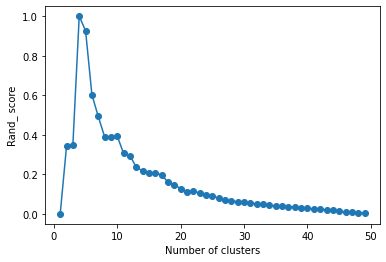

In [ ]:
# plot
plt.plot(range(1, 50), rand, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Rand_ score')
plt.show()

In [ ]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
print("David_bouldin_score: ",davies_bouldin_score(X, labels))
print("Silhoutte_score: ", silhouette_score(X, labels))
print("Calinski_harabasz_score: ",calinski_harabasz_score(X, labels))

David_bouldin_score:  0.413696360675584
Silhoutte_score:  0.5702435264144388
Calinski_harabasz_score:  287.76700587856266
